✅ Accuracy: 0.9820627802690582

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



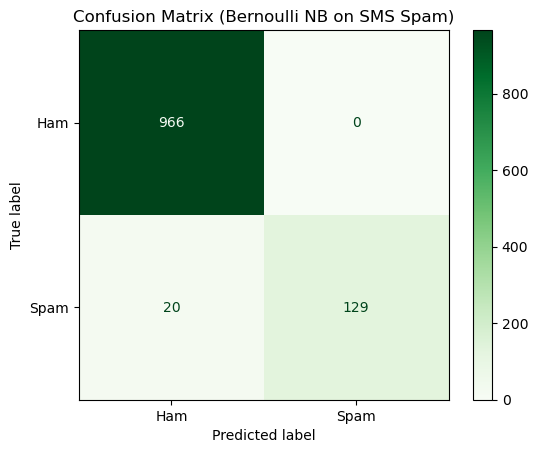

In [7]:
# 📦 Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 📄 Load the dataset
file_path = "/Users/anirudhravipudi/Desktop/AI/Practice/SMSSpamCollection.txt"
df = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'message'])

# ✅ Encode labels: spam = 1, ham = 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# 📊 Binary CountVectorizer (presence/absence of words)
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 🔮 Train Bernoulli Naive Bayes
model = BernoulliNB()
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# 📈 Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# 📉 Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Ham", "Spam"], cmap="Greens")
plt.title("Confusion Matrix (Bernoulli NB on SMS Spam)")
plt.show()